[View Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)  
[Docs: Pandas](https://pandas.pydata.org/docs/) | [Docs: Seaborn](https://seaborn.pydata.org/)

# 🏡 House Price EDA (Kaggle Ames)

This notebook walks through a **structured, story-driven EDA** of the Ames House Prices dataset.

We’ll follow this roadmap:

1. **Data Inspection & Target Audit** – What does the raw data *look* like?
2. **Cleaning with IQR** – How do we treat extreme `SalePrice` values?
3. **Multivariate Analysis** – Which features move together with price?
4. **Profiling & Managerial Report** – What should a non-technical manager remember?

The idea is to keep things:
- ✅ Reproducible  
- ✅ Well-commented  
- ✅ Human-readable (not just charts dumped on the screen)


## 🧭 What we're going to cover

| Phase | Focus                                   | Key Deliverables                                                                 |
|------:|-----------------------------------------|----------------------------------------------------------------------------------|
| 1     | Data inspection & target audit          | `.head(10)`, `.info()`, feature type lists, target stats, histogram + Q-Q plots |
| 2     | Cleaning via IQR                        | IQR bounds, rows filtered, boxplots “before vs after”                           |
| 3     | Multivariate analysis                   | Correlation heatmap, top 10 drivers, OverallQual vs price, neighborhood chart   |
| 4     | Profiling & managerial summary          | Pandas Profiling report + written “manager report”                              |

Along the way we’ll sprinkle in:
- Missing value checks  
- Extra multivariate visuals (scatter/regression plots, group summaries)  

# Phase 0: Imports & Config

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Plot settings
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)


In [3]:
# Show more columns
pd.set_option("display.max_columns", 80)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

## Phase 1.1 Load the Dataset

In [4]:
DATA_PATH = r"C:\Users\USER\DATA-SCINCE-AI\INCEPTION_BD_WORKSPACE\FSDS_BOOTCAMP\FSDS-ASSIGNMENT\EDA\house-prices-advanced-regression-techniques\train.csv"
df = pd.read_csv(DATA_PATH)

print(f"✅ Data loaded. Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
df.head(10)

✅ Data loaded. Shape: 1,460 rows × 81 columns


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   
5   6          50       RL        85.00    14115   Pave   NaN      IR1   
6   7          20       RL        75.00    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM        51.00     6120   Pave   NaN      Reg   
9  10         190       RL        50.00     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   
5        0.00        TA        TA       Wood       Gd       TA           No   
6      186.00        Gd        TA      PConc       Ex       TA           Av   
7      240.00        TA        TA     CBlock       Gd       TA           Mn   
8        0.00        TA        TA     BrkTil       TA       TA           No   
9       

## Phase 1.2: Glimpse at structure

In [5]:
print("🧱 Basic info:")
print("-" * 80)
df.info()
print("-" * 80)
print("\n📊 Summary statistics (numeric only):")
df.describe().T.head(15)

🧱 Basic info:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  H

count      mean      std      min      25%      50%       75%  \
Id           1,460.00    730.50   421.61     1.00   365.75   730.50  1,095.25   
MSSubClass   1,460.00     56.90    42.30    20.00    20.00    50.00     70.00   
LotFrontage  1,201.00     70.05    24.28    21.00    59.00    69.00     80.00   
LotArea      1,460.00 10,516.83 9,981.26 1,300.00 7,553.50 9,478.50 11,601.50   
OverallQual  1,460.00      6.10     1.38     1.00     5.00     6.00      7.00   
OverallCond  1,460.00      5.58     1.11     1.00     5.00     5.00      6.00   
YearBuilt    1,460.00  1,971.27    30.20 1,872.00 1,954.00 1,973.00  2,000.00   
YearRemodAdd 1,460.00  1,984.87    20.65 1,950.00 1,967.00 1,994.00  2,004.00   
MasVnrArea   1,452.00    103.69   181.07     0.00     0.00     0.00    166.00   
BsmtFinSF1   1,460.00    443.64   456.10     0.00     0.00   383.50    712.25   
BsmtFinSF2   1,460.00     46.55   161.32     0.00     0.00     0.00      0.00   
BsmtUnfSF    1,460.00    567.24   441.87     0.00   223.00   477.50    808.00   
TotalBsmtSF  1,460.00  1,057.43   438.71     0.00   795.75   991.50  1,298.25   
1stFlrSF     1,460.00  1,162.63   386.59   334.00   882.00 1,087.00  1,391.25   
2ndFlrSF     1,460.00    346.99   436.53     0.00     0.00     0.00    728.00   

                    max  
Id             1,460.00  
MSSubClass       190.00  
LotFrontage      313.00  
LotArea      215,245.00  
OverallQual       10.00  
OverallCond        9.00  
YearBuilt      2,010.00  
YearRemodAdd   2,010.00  
MasVnrArea     1,600.00  
BsmtFinSF1     5,644.00  
BsmtFinSF2     1,474.00  
BsmtUnfSF      2,336.00  
TotalBsmtSF    6,110.00  
1stFlrSF       4,692.00  
2ndFlrSF       2,065.00

## Phase 1.3: Variable categorization

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Target is SalePrice (we'll keep it separate conceptually)
if "SalePrice" in numeric_cols:
    numeric_cols.remove("SalePrice")

print(f"🔢 Numerical features ({len(numeric_cols)}):")
print(numeric_cols[:20], "..." if len(numeric_cols) > 20 else "")

print("\n🔤 Categorical features ({len_cat}):".format(len_cat=len(categorical_cols)))
print(categorical_cols[:20], "..." if len(categorical_cols) > 20 else "")

numerical_features = numeric_cols
categorical_features = categorical_cols

🔢 Numerical features (37):
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath'] ...

🔤 Categorical features (43):
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond'] ...


## Phase 1.4: Target variable: SalePrice

In [7]:
target = df["SalePrice"].dropna()

mean_val = target.mean()
median_val = target.median()
skew_val = target.skew()
kurt_val = target.kurt()

print("🎯 Target: SalePrice\n")
print(f"Mean     : {mean_val:,.2f}")
print(f"Median   : {median_val:,.2f}")
print(f"Skewness : {skew_val:,.2f}")
print(f"Kurtosis : {kurt_val:,.2f}")

🎯 Target: SalePrice

Mean     : 180,921.20
Median   : 163,000.00
Skewness : 1.88
Kurtosis : 6.54


## Phase 1.5: Histogram + KDE for SalePrice

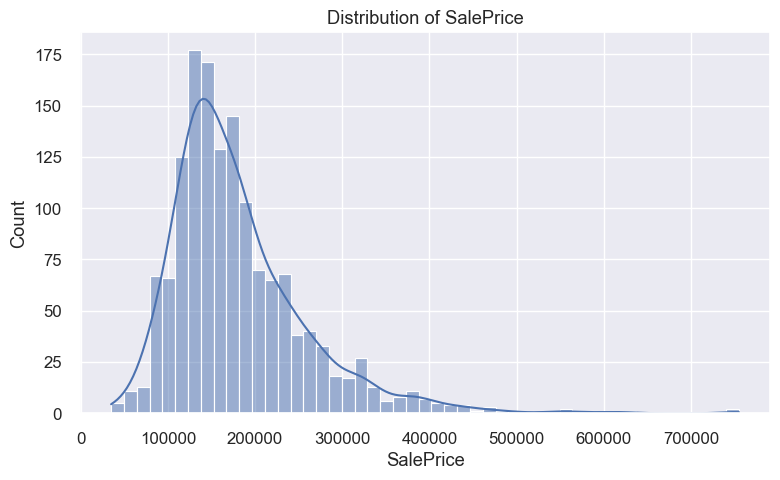

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.histplot(target, kde=True, ax=ax)
ax.set_title("Distribution of SalePrice")
ax.set_xlabel("SalePrice")
plt.tight_layout()
plt.show()

## Phase 1.6: Q-Q plot for SalePrice and log-transformed SalePrice

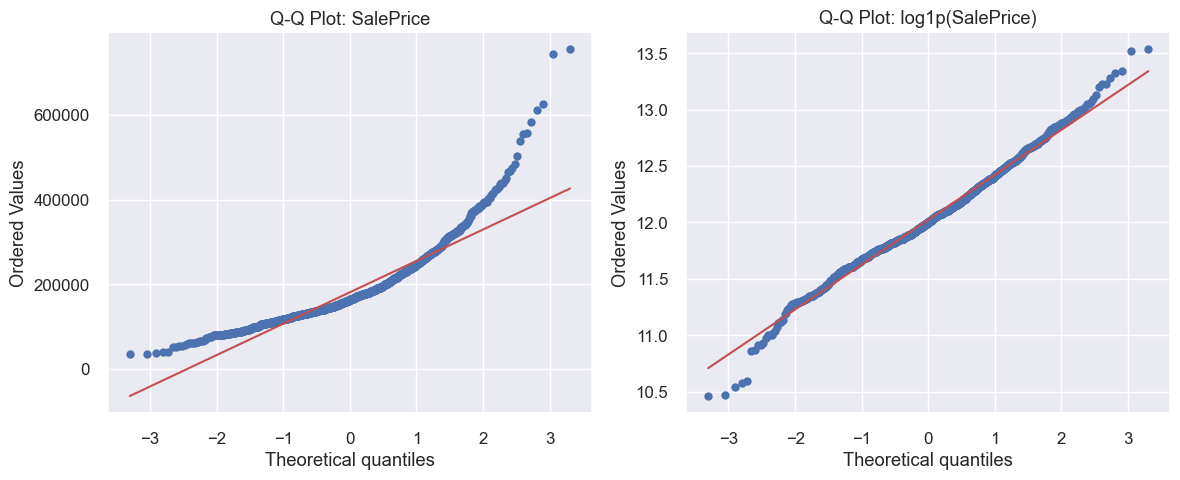

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q for raw SalePrice
stats.probplot(target, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot: SalePrice")

# Log transform
df["SalePrice_log"] = np.log1p(df["SalePrice"])
target_log = df["SalePrice_log"].dropna()

stats.probplot(target_log, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot: log1p(SalePrice)")

plt.tight_layout()
plt.show()



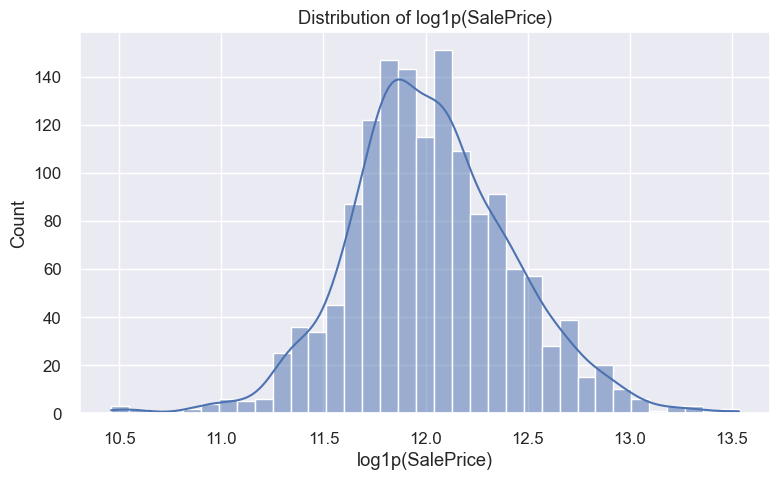

In [10]:
# Quick histogram for log target
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(target_log, kde=True, ax=ax)
ax.set_title("Distribution of log1p(SalePrice)")
ax.set_xlabel("log1p(SalePrice)")
plt.tight_layout()
plt.show()

> 💬 **Narrative takeaway**
> “The raw `SalePrice` is right-skewed with heavy tails. After applying a `log1p` transform, the distribution becomes more symmetric and closer to normal, which will help many models.”

## Phase 2.1: IQR-based outlier detection for SalePrice

In [11]:
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("📏 IQR-based bounds for SalePrice")
print(f"Q1         : {Q1:,.2f}")
print(f"Q3         : {Q3:,.2f}")
print(f"IQR        : {IQR:,.2f}")
print(f"Lower bound: {lower_bound:,.2f}")
print(f"Upper bound: {upper_bound:,.2f}")

📏 IQR-based bounds for SalePrice
Q1         : 129,975.00
Q3         : 214,000.00
IQR        : 84,025.00
Lower bound: 3,937.50
Upper bound: 340,037.50


## Phase 2.2: Filter rows by SalePrice IQR

In [12]:
before_shape = df.shape

mask = (df["SalePrice"] >= lower_bound) & (df["SalePrice"] <= upper_bound)
df_iqr = df.loc[mask].copy()

after_shape = df_iqr.shape

print(f"🔍 Rows before IQR filtering : {before_shape[0]:,}")
print(f"🔍 Rows after IQR filtering  : {after_shape[0]:,}")
print(f"🚫 Rows removed as outliers  : {before_shape[0] - after_shape[0]:,}")
print(f"(% removed: {100 * (before_shape[0] - after_shape[0]) / before_shape[0]:.2f}%)")

🔍 Rows before IQR filtering : 1,460
🔍 Rows after IQR filtering  : 1,399
🚫 Rows removed as outliers  : 61
(% removed: 4.18%)


## Phase 2.3: Boxplots before and after IQR filtering

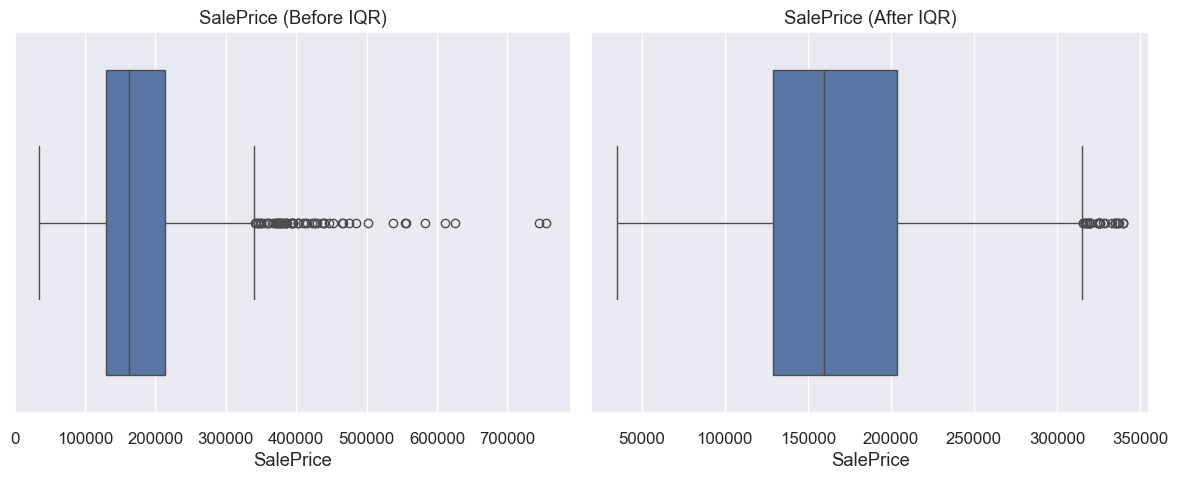

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df["SalePrice"], ax=axes[0])
axes[0].set_title("SalePrice (Before IQR)")
axes[0].set_xlabel("SalePrice")

sns.boxplot(x=df_iqr["SalePrice"], ax=axes[1])
axes[1].set_title("SalePrice (After IQR)")
axes[1].set_xlabel("SalePrice")

plt.tight_layout()
plt.show()

## Extra: Missing value audit (helps for Phase 4 too)

In [14]:
missing = df_iqr.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("🕳️ Features with missing values (after IQR filtering):")
missing.head(20)

🕳️ Features with missing values (after IQR filtering):


PoolQC          1393
MiscFeature     1345
Alley           1308
Fence           1122
MasVnrType       861
FireplaceQu      689
LotFrontage      256
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         7
Electrical         1
dtype: int64

## Optional missingness heatmap (top 20 most-missing columns)

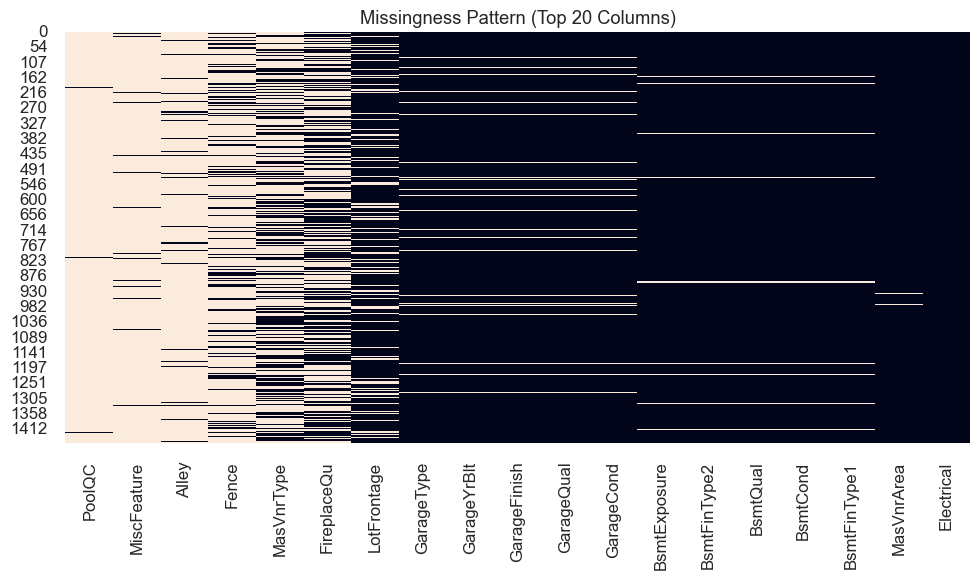

In [15]:
top_missing_cols = missing.head(20).index.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(df_iqr[top_missing_cols].isnull(), cbar=False)
plt.title("Missingness Pattern (Top 20 Columns)")
plt.tight_layout()
plt.show()

## Phase 3.1: Correlation matrix & heatmap

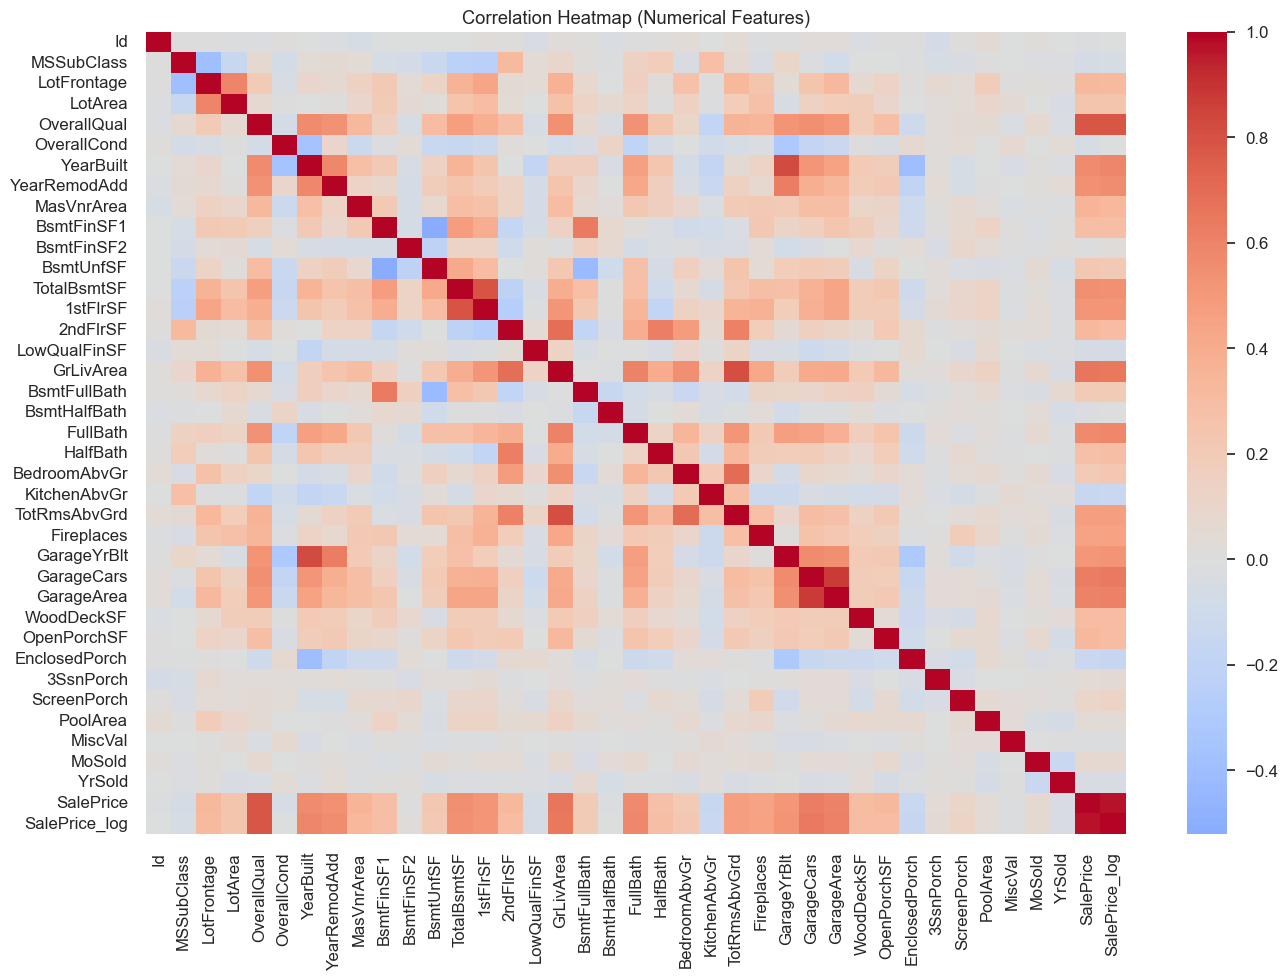

In [16]:
# Use only numeric columns (including log target)
num_cols_for_corr = df_iqr.select_dtypes(include=[np.number]).columns.tolist()

corr_matrix = df_iqr[num_cols_for_corr].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

## Phase 3.2: Top 10 features most correlated with SalePrice

In [17]:
saleprice_corr = corr_matrix["SalePrice"].drop("SalePrice").sort_values(key=np.abs, ascending=False)

top_10 = saleprice_corr.head(10)
print("🔥 Top 10 features most correlated with SalePrice:")
display(top_10.to_frame("Correlation with SalePrice"))

🔥 Top 10 features most correlated with SalePrice:


Correlation with SalePrice
SalePrice_log                        0.97
OverallQual                          0.78
GrLivArea                            0.66
GarageCars                           0.63
GarageArea                           0.61
FullBath                             0.58
YearBuilt                            0.56
TotalBsmtSF                          0.54
YearRemodAdd                         0.54
1stFlrSF                             0.52

> Typically **OverallQual**, **GrLivArea**, **GarageCars**, **GarageArea**,
> **TotalBsmtSF**, **1stFlrSF**, **FullBath**, etc. near the top.

In [18]:
top_3_features = top_10.index[:3].tolist()
top_3_features

['SalePrice_log', 'OverallQual', 'GrLivArea']

## Scatter with regression line for raw SalePric

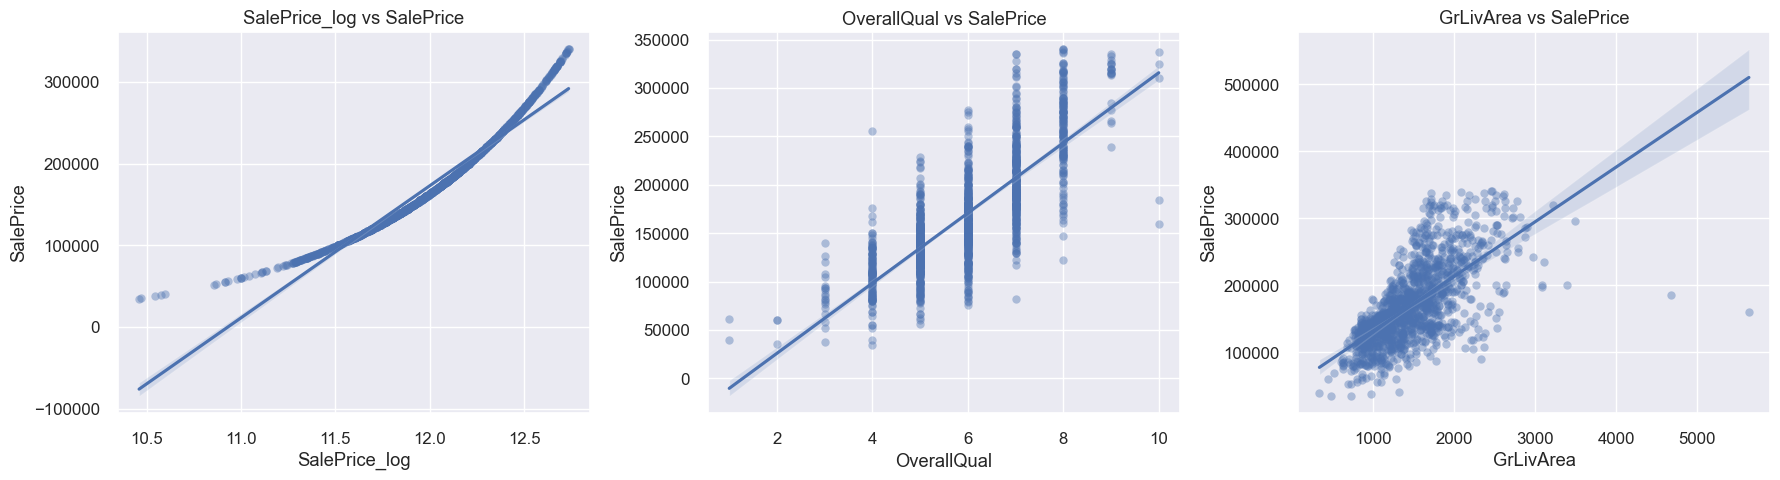

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, feat in zip(axes, top_3_features):
    sns.regplot(data=df_iqr, x=feat, y="SalePrice", ax=ax, scatter_kws={"alpha": 0.4})
    ax.set_title(f"{feat} vs SalePrice")

plt.tight_layout()
plt.show()

## Scatter with log-transformed target

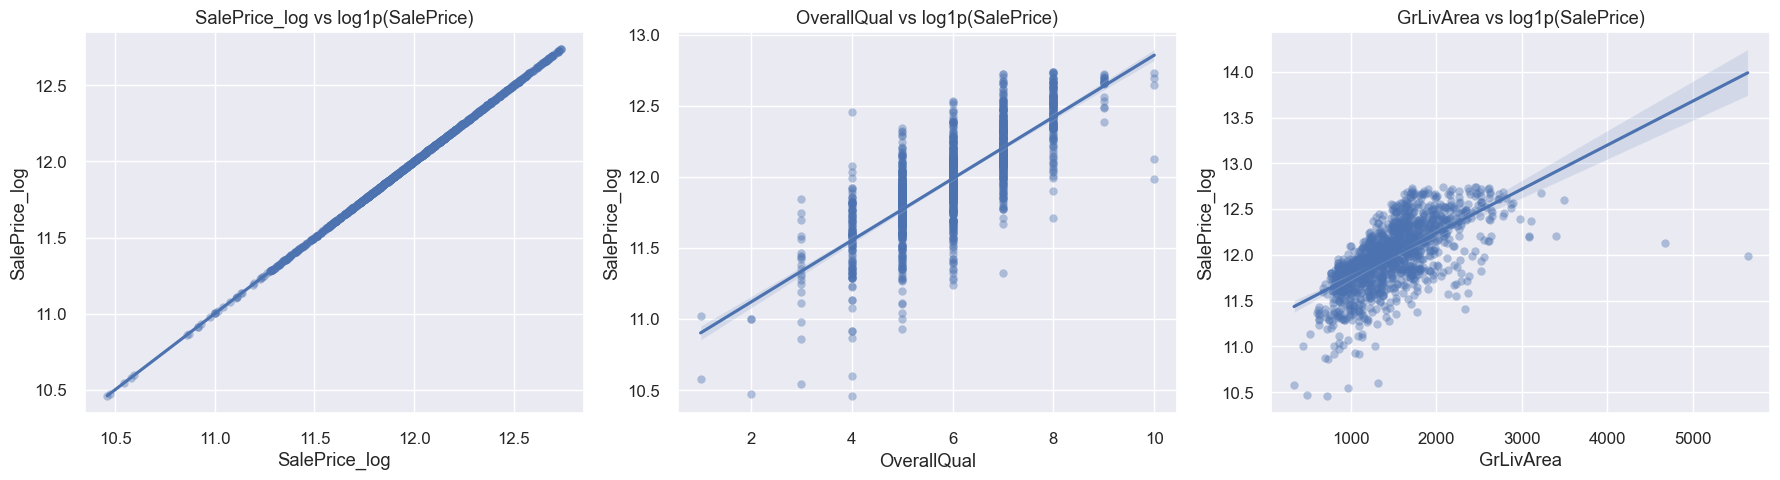

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, feat in zip(axes, top_3_features):
    sns.regplot(data=df_iqr, x=feat, y="SalePrice_log", ax=ax, scatter_kws={"alpha": 0.4})
    ax.set_title(f"{feat} vs log1p(SalePrice)")

plt.tight_layout()
plt.show()

## Phase 3.3: Categorical deep-dive – OverallQual vs SalePrice

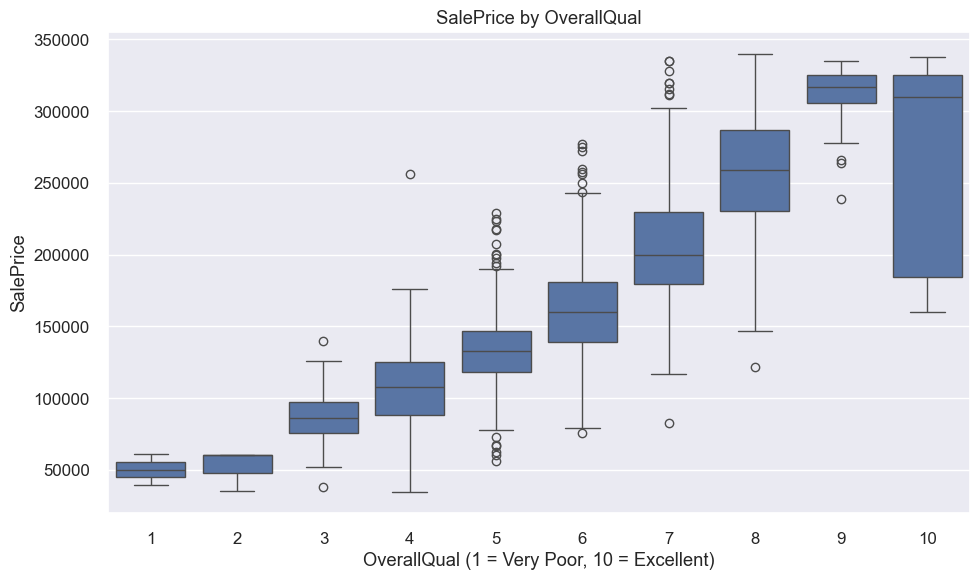

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iqr, x="OverallQual", y="SalePrice")
plt.title("SalePrice by OverallQual")
plt.xlabel("OverallQual (1 = Very Poor, 10 = Excellent)")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()


## Optional: use log target to reduce skew

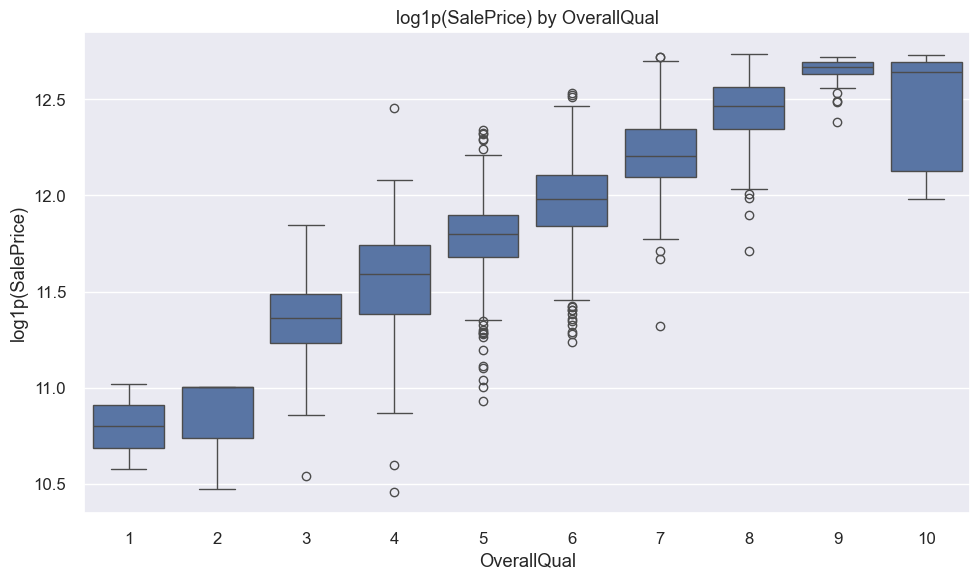

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iqr, x="OverallQual", y="SalePrice_log")
plt.title("log1p(SalePrice) by OverallQual")
plt.xlabel("OverallQual")
plt.ylabel("log1p(SalePrice)")
plt.tight_layout()
plt.show()

> 💡 This usually shows a **strong, monotonic increase**: better overall quality → higher price.

# Phase 3.4: Neighborhood analysis – average price per neighborhood

In [23]:
neigh_stats = (
    df_iqr
    .groupby("Neighborhood")["SalePrice"]
    .agg(["mean", "median", "count"])
    .sort_values("mean", ascending=False)
)

print("🏘️ Neighborhood price summary (top 10 by mean SalePrice):")
display(neigh_stats.head(10))

🏘️ Neighborhood price summary (top 10 by mean SalePrice):


mean     median  count
Neighborhood                             
NoRidge      282,386.93 282,500.00     30
NridgHt      260,396.52 274,450.00     50
StoneBr      239,312.50 237,750.00     16
Timber       230,914.37 224,500.00     35
Veenker      224,150.00 206,000.00     10
Somerst      221,295.10 223,500.00     84
ClearCr      212,565.43 200,250.00     28
Crawfor      200,192.94 195,550.00     48
CollgCr      195,175.85 195,950.00    148
Blmngtn      194,870.88 191,000.00     17

In [24]:
# "Beverly Hills" of Ames = the neighborhood with highest mean price
beverly_hills = neigh_stats.head(1)
print("\n💎 Highest-priced neighborhood (our 'Beverly Hills'):")
display(beverly_hills)


💎 Highest-priced neighborhood (our 'Beverly Hills'):


mean     median  count
Neighborhood                             
NoRidge      282,386.93 282,500.00     30

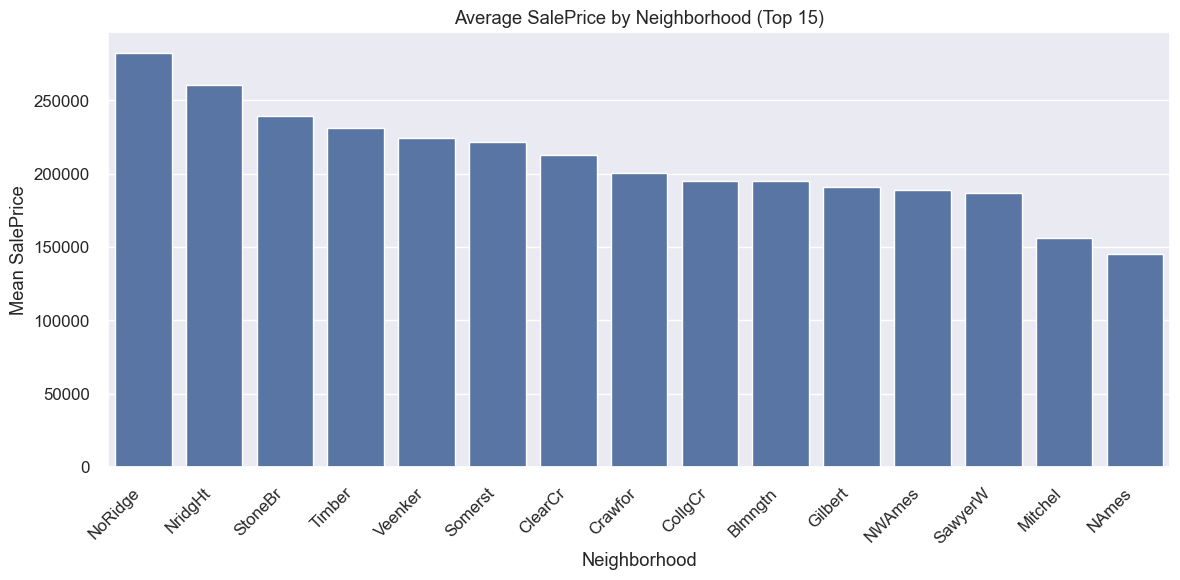

In [25]:
# Barplot of average SalePrice by neighborhood (top 15 for readability)

top_n = 15
top_neigh = neigh_stats.head(top_n).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_neigh, x="Neighborhood", y="mean")
plt.title(f"Average SalePrice by Neighborhood (Top {top_n})")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean SalePrice")
plt.tight_layout()
plt.show()

# 📊 Phase 4: Managerial Summary 


## 1️⃣ Top 3 Drivers of Price

Based on the correlation analysis and visuals:

1. **OverallQual (Overall Material & Finish Quality)**  
   - Strong, near-linear relationship with price.  
   - Each step up in quality band (e.g., 5 → 7) corresponds to a large jump in typical `SalePrice`.

2. **GrLivArea (Above-ground living area in sq ft)**  
   - Larger homes are consistently more expensive.  
   - Relationship is roughly linear after log-transforming `SalePrice`.

3. **Garage-related / Basement-related size features**  
   - Variables like **GarageCars**, **GarageArea**, **TotalBsmtSF**, **1stFlrSF** show solid positive correlations.  
   - More functional and larger utility space → higher sale prices.

> **Plain English:**  
> Buyers pay for **quality**, **usable living area**, and **functional space** (garage & basement).

---

## 2️⃣ Anomaly & Data Quality Report

From the missing value and profiling analysis:

- Several features (e.g., `PoolQC`, `Alley`, `Fence`, `MiscFeature`, `FireplaceQu`) have **very high missing rates**.  
  - Often these truly mean “No pool”, “No alley access”, “No fence”, etc.  
  - We should encode them carefully instead of dropping them blindly.
- Some numeric variables are **heavily skewed** (e.g., lot area, basement area).  
  - For modeling, log or other transformations may help.
- A few neighborhoods have **very few observations** but very high prices.  
  - These may look like outliers and can strongly influence models if not handled.

**Risk for modeling:**

- If we do not encode “missing = absence” correctly, models may misinterpret missingness as random noise.  
- Rare categories (e.g., unusual neighborhoods, rare house styles) may lead to overfitting.

---

## 3️⃣ Visuals to Show in a Slide Deck (Top 4)

If you only had **4 charts** to show a stakeholder, they should be:

1. **Before vs After Boxplot for SalePrice (IQR cleaning)**  
   - Shows how we treat extreme prices and stabilize the target distribution.

2. **OverallQual vs SalePrice (boxplot)**  
   - Very clean story: higher quality → higher price.

3. **Bar Chart of Average SalePrice by Neighborhood**  
   - Clear visual of “premium” vs “affordable” areas (our “Beverly Hills” neighborhood stands out).

4. **Correlation Heatmap (numeric features)**  
   - Summarizes which variables tend to move together with price and with each other.

---

## 4️⃣ Recommended Next Steps

1. **Feature Engineering**
   - Combine related features (e.g., total bathrooms, total SF including basement).
   - Create age-related features (house age, time since remodel).

2. **Missing Value Strategy**
   - Explicitly encode “None” categories (no pool, no fence) instead of dropping rows.

3. **Modeling Roadmap**
   - Start with a simple linear/regularized model on log-transformed `SalePrice`.  
   - Then move to tree-based models (RandomForest, XGBoost, LightGBM) with cross-validation.

> ✅ This EDA gives us a **clean target**, highlights **key drivers**,  
> and flags **data issues** so the modeling phase can be faster and less painful.

## Pandas Profiling (ydata profiling )

In [26]:
from ydata_profiling import ProfileReport
from IPython.display import IFrame

# FULL data: kono row sample korchi na
# Multivariate heavy part komanor jonno: interactions / correlations / missing_diagrams / duplicates == off
profile = ProfileReport(
    df,
    title="House Prices – Compact Profile",
    explorative=False,      # exploratory extra gulo off
    samples=None,           # sample tables (head/tail/random) na dekhale report chhoto hoy
    correlations=None,      # sob correlation matrices off
    interactions=None,      # pairwise interaction plots / multivariate "show more" off
    missing_diagrams=None,  # big missing heatmap etc off
    duplicates=None         # duplicate rows preview off
)

# Boro HTML notebook er vitor embed korar pore rather alada file e rakhi
profile.to_file("house_profile_compact.html")
print("✅ Saved: house_profile_compact.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 82/82 [00:00<00:00, 161.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved: house_profile_compact.html


In [29]:
profile